# Tesla Stock History
### by Arnar Ólafsson, Sindri Snæfells Kristinsson & Kristófer Stefánsson
#### [Reykjavík University](https://www.ru.is/)

## Table of contents

1. [Introduction](#Introduction)

2. [Required libraries](#Required-libraries)

3. [Step 1: Get to know our data](#Step-1:-Get-to-know-our-data)

4. [Step 2: Preparing our data](#Step-2:-Preparing-our-data)

5. [Step 3: Compare the datasets](#Step-3:-Compare-the-datasets)

6. [Step 4: Predicting future stock prices](#Step-4:-Predicting-future-stock-prices)

## Introduction

[[ go back to the top ]](#Table-of-contents)

This notebook is about Elon Musk and we will be focusing mainly on his company Tesla. We will go through a timeframe from late 2010 to early 2020 and see the growth of his company.

Tesla, Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. The company specializes in electric vehicle manufacturing, battery energy storage from home to grid scale and, through its acquisition of SolarCity, solar panel and solar roof tile manufacturing.

Elon Musk is the co-founder and CEO at Tesla, overseeing all product design, engineering and manufacturing of the company's electric vehicles, battery products, and Solar Roofs.

Our resources are dwindling here on our home planet and we can see a shift in people's perspective about our surroundings. We think that the best way to invest your money is on 'Green' companies that provide their services through self sustainability.

Enter Elon Musk, nothing short of a genius entrepreneur has made it his mission to make the world better and one of his mission is his electric cars. We compare stock prices of Tesla and other car manufactuers and look at what the market wants. 

We will take a glimpse of how Elon Musks actions in his daily life affect his company and take a look at how important he is to the success of Tesla.

Lastly we'll be attempting to predict Tesla's stock value from historic data.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **datetime**: The datetime module supplies classes for manipulating dates and times.

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

## Step 1: Get to know our data

[[ go back to the top ]](#Table-of-contents)

We have 3 datasets, our primary dataset is the stock history of the car maker Tesla. The 2 other datasets are the stock histories for Ford Motor Company & General Motors, they are secondary in this notebook and only serve to compare to our Tesla dataset.
   - Tesla
   - Ford Motor Company
   - General Motors

In [462]:
tesla_df = pd.read_csv('TSLA.csv')
ford_motor_df = pd.read_csv('FordMotorCompany.csv')
general_motor_df = pd.read_csv('GM.csv')

print('Shape of our datasets')
print(tesla_df.shape)
print(ford_motor_df.shape)
print(general_motor_df.shape)

#print(tesla_df.head())
#print(ford_motor_df.head())
#print(general_motor_df.head())

#tesla_df.head()
#ford_motor_df.head()
#general_motor_df.head()

Shape of our datasets
(2416, 7)
(12057, 7)
(2350, 7)


## Lets take a look at Tesla's stock history by plotting it on a graph.

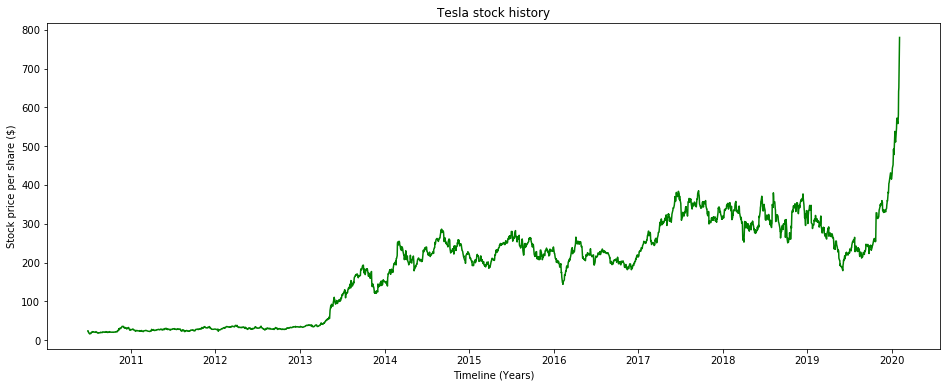

In [463]:
list_of_datetimes = tesla_df['Date']
list_of_datetimes.head()
plt.figure(figsize = (16, 6))
list_of_datetimes = pd.to_datetime(list_of_datetimes)

plt.title('Tesla stock history')
plt.xlabel('Timeline (Years)')
plt.ylabel('Stock price per share ($)')

plt.plot(list_of_datetimes, tesla_df['Adj Close'], color = 'green', label = 'Tesla')

plt.show()

## Step 2: Preparing our data

[[ go back to the top ]](#Table-of-contents)

Since all of our datasets are not spanning over the same timeframe we'll have to reduce them so that they fit the same exact timeline. 

If a row is missing we'll simply drop it since a "few" missing rows won't affect the outcome too much.

We also want to normalize the 'Adj Close' (adjusting closing) price for each dataset since an individual stock cannot be compared to another individual stock, the company with the highest value per stock would dominate the graph.

In [464]:
# byrjum á því að setja ford og gm yfir á sömu tímalínu og tesla
tesla_df = tesla_df[100:2416]
ford_motor_df = ford_motor_df[9707:12023]
general_motor_df = general_motor_df[0:2316]

# ef að það vantar gildi þá droppum við þeirri röð þar sem að gögnin eru nógu stór til að örfáar raðir breyta litlu
tesla_df.fillna(value=-99999, inplace = True)
tesla_df.dropna(inplace=True)

# scaler til að skala gögnin frá 0 - 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaler2 = MinMaxScaler(feature_range = (0, 1))
scaler3 = MinMaxScaler(feature_range = (0, 1))

#tesla
#scaler = scaler.fit(tesla_df[['Adj Close']])
tesla_normalized = scaler.fit_transform(tesla_df[['Adj Close']])

#ford
#scaler2 = scaler2.fit(ford_motor_df[['Adj Close']])
ford_normalized = scaler2.fit_transform(ford_motor_df[['Adj Close']])

#gm
#scaler3 = scaler3.fit(general_motor_df[['Adj Close']])
gm_normalized = scaler3.fit_transform(general_motor_df[['Adj Close']])


# doesent matter which date we use, tesla, ford or gm since they have all been cut to fit the same timeline
list_of_datetimes = tesla_df['Date']
list_of_datetimes.head()

list_of_datetimes = pd.to_datetime(list_of_datetimes)

## Step 3: Compare the datasets

[[ go back to the top ]](#Table-of-contents)

We've cleaned and wrangled the dataset so that it should be ready for the work ahead.
We're interested in seeing both how the companies have fared on the stock marked these past years aswell as how they compare to one another in company value.

### Comparison on stock's performance

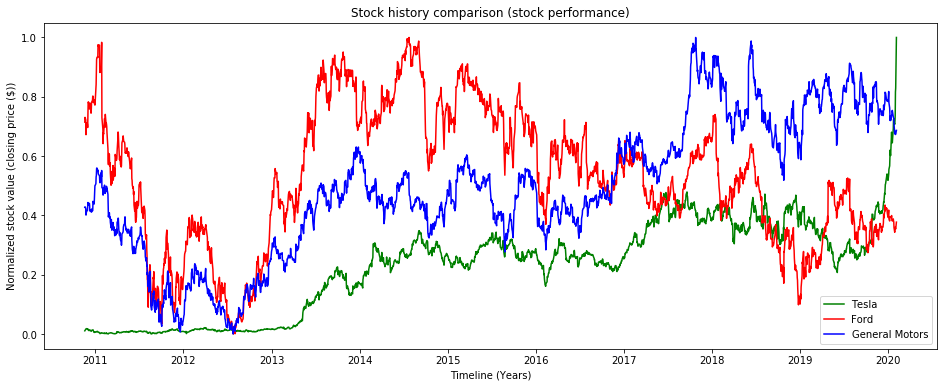

In [465]:
plt.figure(figsize = (16, 6))

plt.plot(list_of_datetimes, tesla_normalized, color = 'green', label = 'Tesla')
plt.plot(list_of_datetimes, ford_normalized, color = 'red', label = 'Ford')
plt.plot(list_of_datetimes, gm_normalized, color = 'blue', label = 'General Motors')

plt.title('Stock history comparison (stock performance)')
plt.xlabel('Timeline (Years)')
plt.ylabel('Normalized stock value (closing price ($))')

plt.legend()

plt.show()

### Comparison on the companies market cap

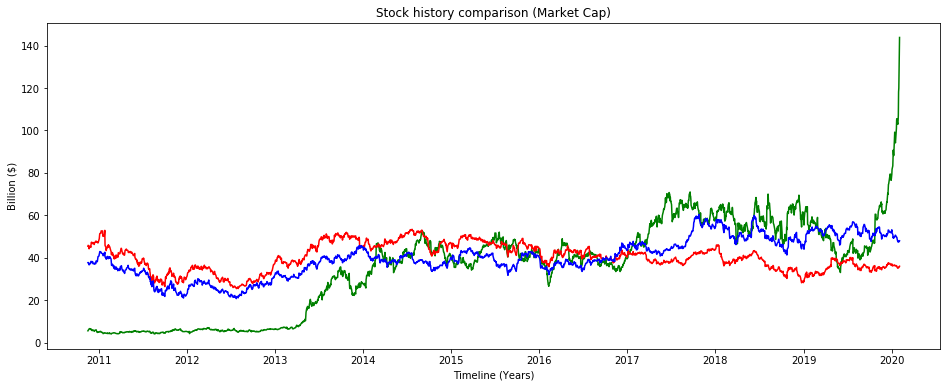

In [466]:
# tesla outstanding shares 184.39M = 184.390.000
# ford outstanding shares 4.004B   = 4.004.000.000
# gm outstanding shares 1.439B     = 1.439.000.000
tesla_outstanding_shares = 184390000
ford_outstanding_shares  = 4004000000
gm_outstanding_shares    = 1439000000

plt.figure(figsize = (16, 6))

# lögum formattið á y ásinum svo að það representi gildin á þann hátt sem við viljum
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

plt.plot(list_of_datetimes, tesla_df['Adj Close'] * tesla_outstanding_shares / 1000000000, color = 'green', label = 'Tesla')
plt.plot(list_of_datetimes, ford_motor_df['Adj Close'] * ford_outstanding_shares / 1000000000, color = 'red', label = 'Ford')
plt.plot(list_of_datetimes, general_motor_df['Adj Close'] * gm_outstanding_shares / 1000000000, color = 'blue', label = 'General Motors')

plt.title('Stock history comparison (Market Cap)')
plt.xlabel('Timeline (Years)')
plt.ylabel('Billion ($)')

#print(tesla_outstanding_shares * 800)

plt.show()

### Elon Musks effect on Tesla's stock price visualized.

2017-11-29
2018-09-18
2017-03-10
2018-04-02
2018-07-13
2018-08-06
2018-08-24
2018-09-28


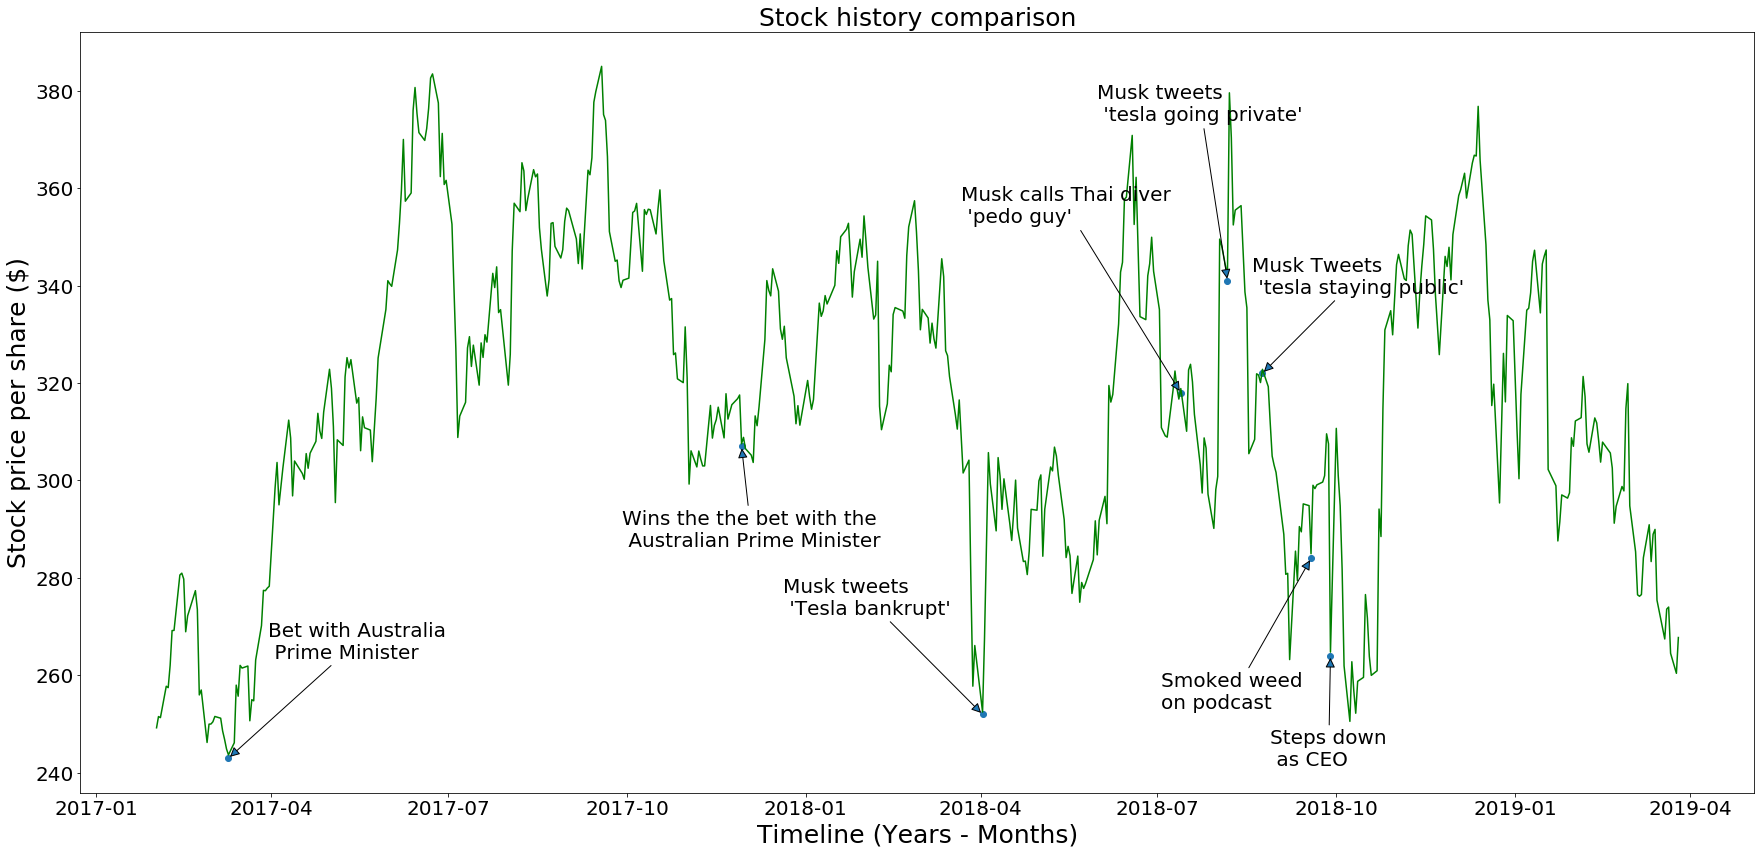

In [467]:
# breytum tímalínunni til að sögupunktarnir okkar séu læsilegri
tesla_points = tesla_df[1560:2100]

list_of_datetimes = tesla_points['Date']
list_of_datetimes.head()
plt.figure(figsize = (30, 14))
list_of_datetimes = pd.to_datetime(list_of_datetimes)

date_of_events = ['2017-11-29', '2018-09-18', '2017-03-10', '2018-04-02',
     '2018-07-13', '2018-08-06', '2018-08-24', '2018-09-28']

#the elon pile
elon_events = ["Wins the the bet with the\n Australian Prime Minister", "Smoked weed \non podcast", "Bet with Australia\n Prime Minister",
      "Musk tweets\n 'Tesla bankrupt'", "Musk calls Thai diver\n 'pedo guy'","Musk tweets\n 'tesla going private'",
      "Musk Tweets\n 'tesla staying public'", "Steps down\n as CEO"]

story_points = []

# finnum hvað verðið var daginn sem "date_of_event" gerðist svo að við getum staðsett sögupunktana vel á graphinu
for i in range(len(date_of_events)):
    closing_value_for_date = (tesla_points.loc[tesla_points['Date'] == date_of_events[i]])
    print(x[i])
    story_points.append(closing_value_for_date['Adj Close'])

    
# þurfum að breyta þeim úr float yfir í int svo að annotate takið við þeim
story_points = [int(i) for i in story_points]

# staðsetning fyrir sögupunktana
xyarray = [(-120, -100), (-150, -150), (40, 100), (-200, 100), (-220, 170), (-130, 160), (-10, 80), (-60, -110)]

#convert the dates to format that our plot will accept
date_of_events = pd.to_datetime(date_of_events)

#fig, ax = plt.subplots()
plt.plot_date(date_of_events, story_points, linestyle='')

# teiknum hvern og einn punk með atburðinum til að segja sögu
for i in range(len(elon_events)):
    plt.annotate(elon_events[i], (mdates.date2num(date_of_events[i]), story_points[i]), xytext=xyarray[i], 
                textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), size = 20)

plt.title('Stock history comparison', fontsize = 25)
plt.xlabel('Timeline (Years - Months)', fontsize = 25)
plt.ylabel('Stock price per share ($)', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.plot(list_of_datetimes, tesla_points['Adj Close'], color = 'green', label = 'Tesla')

plt.show()

## Step 4: Predicting future stock prices

[[ go back to the top ]](#Table-of-contents)

Lets try to predict the future stock prices by using some methods we've learned throughout the course.


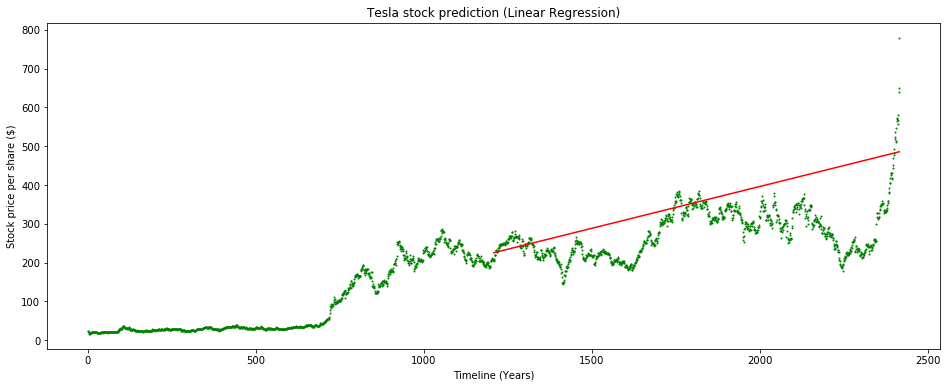

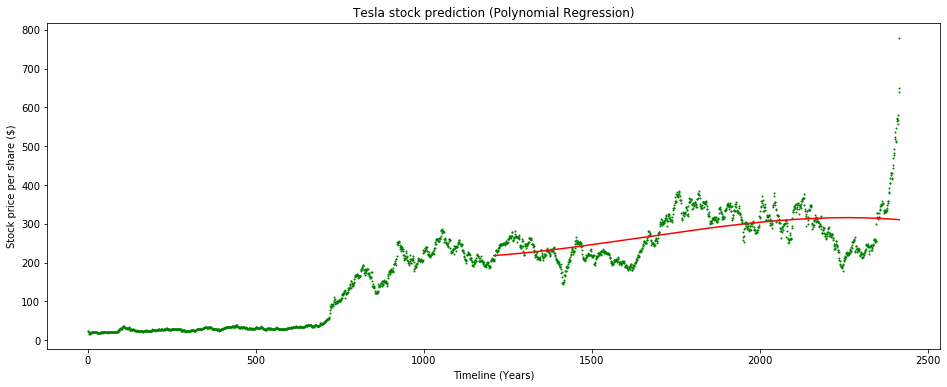

In [469]:
data = pd.read_csv('TSLA.csv')

data['Date'] = pd.to_datetime(data['Date'])

X = np.array(data.index).reshape(-1,1)
y = data['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# það verður að skipta time series gögnum í fyrri og seinni helminga
X_train = X[:int(X.shape[0]*0.5)]
X_test = X[int(X.shape[0]*0.5):]
y_train = y[:int(X.shape[0]*0.5)]
y_test = y[int(X.shape[0]*0.5):]

# fyrsta módelið okkar, linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize = (16, 6))
plt.title('Tesla stock prediction (Linear Regression)')
plt.xlabel('Timeline (Years)')
plt.ylabel('Stock price per share ($)')

plt.scatter(X_train, y_train, color = 'green', s = 1)
plt.scatter(X_test, y_test, color = 'green', s = 1)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

# seinna módelið okkar, polynomial regression
model = PolynomialFeatures(degree = 3)  
X_poly = model.fit_transform(X_train)

poly_model = LinearRegression()

poly_model.fit(X_poly, y_test)

y_pred = poly_model.predict(X_poly)

plt.figure(figsize = (16, 6))
plt.title('Tesla stock prediction (Polynomial Regression)')
plt.xlabel('Timeline (Years)')
plt.ylabel('Stock price per share ($)')

plt.scatter(X_train, y_train, color = 'green', s = 1)
plt.scatter(X_test, y_test, color = 'green', s = 1)
plt.plot(X_test, y_pred, color = 'red')

plt.show()